[목표]
- 500명의 키와 몸무게, 비만도 라벨을 이용하여 비만을 판단하는 모델을 만들어보자
- 머신러닝 전체 과정의 흐름을 이해하자

머신러닝 학습 - 7단계 
AND 연산
1. 문제정의
2. 데이터 만들기
3. 데이터 전처리
4. 탐색적 데이터 분석(EDA) => 생략
5. 모델생성, 하이퍼파라미터 정의(튜닝)
6. 학습
7. 평가

### 문제정의
- 머신러닝을 통해서 어떤 문제를 해결할 것인가? 
- 지도 vs 비지도 vs 강화
- 지도 : 분류 vs 회귀
- 비만을 판단하는 모델을 만들자 ==> 지도학습 - 분류 

### 데이터 수집
- csv 파일로 이루어진 데이터 수집 
- 500명의 성별, 키, 몸무게, 비만도 등급 

In [1]:
# 데이터 꺼내오기 
import pandas as pd 
bmi = pd.read_csv('./data/bmi_500.csv')
bmi

,Gender,Height,Weight,Label
0,Male,174,96,Obesity
1,Male,189,87,Normal
2,Female,185,110,Obesity
3,Female,195,104,Overweight
4,Male,149,61,Overweight
...,...,...,...,...
495,Female,150,153,Extreme Obesity
496,Female,184,121,Obesity
497,Female,141,136,Extreme Obesity
498,Male,150,95,Extreme Obesity


### 데이터 전처리 (내가 수집한 데이터의 오류나 빈값이 없는지 확인)
- 1. 결측치 처리 : 비어있는 데이터를 채워주기 
- 2. 이상치 처리 : 정상적인 범위를 벗어난 데이터 수정하기 

#### 결측치 확인
- 데이터프레임의 형태를 갖춘 후 info() 함수 사용

In [2]:
bmi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Gender  500 non-null    object
 1   Height  500 non-null    int64 
 2   Weight  500 non-null    int64 
 3   Label   500 non-null    object
dtypes: int64(2), object(2)
memory usage: 15.8+ KB


#### 이상치 확인
- 데이터프레임의 형태를 갖춘 후 describe() 함수 사용
- describe() : 수치형 데이터만 분석가능, 기술통계

In [3]:
bmi.describe()
# count : 데이터 수
# mean : 평균값
# std : 표준편차
# min : 최소값
# 25% : 1분위수
# 50% : 중앙값
# 75% : 3분위수
# max : 최대값 

# 1. min, max 확인하기 
# 2. 평균(mean), 중앙값(50%) 확인하기 ==> 두 수치가 비슷한지 확인 : 우리의 데이터는 이상치 X
# 3. 두 수치(평균, 중앙값)가 비슷하지 않을 경우 : min ~ max까지 5개의 간격을 확인하기
#     ==> 각 구간의 데이터가 고르게 분포가 되어있는지 확인 


# 우리의 데이터는 정상적인 데이터로 판단이 됨 

,Height,Weight
count,500.000000,500.000000
mean,169.944000,106.000000
std,16.375261,32.382607
min,140.000000,50.000000
25%,156.000000,80.000000
50%,170.500000,106.000000
75%,184.000000,136.000000
max,199.000000,160.000000


### 탐색적 데이터 분석(EDA)
- 데이터를 자세하게 살펴보자
- 비만도별로 데이터가 잘 나뉘어져있는지 확인 

#### 비만도 등급 확인

In [4]:
# 중복 값을 제거하고 확인 - unique()
bmi['Label'].unique()

# 'Obesity',   비만
# 'Normal',    정상
# 'Overweight', 과체중
# 'Extreme Obesity', 고도비만
# 'Weak',       저체중    
# 'Extremely Weak'   극심한 저체중 

array(['Obesity', 'Normal', 'Overweight', 'Extreme Obesity', 'Weak',
       'Extremely Weak'], dtype=object)

#### Label이 Weak인 사람들만 추려보기

In [5]:
# 불리언 인덱싱
# bmi[bmi['Label'] == 'Weak']

bol = bmi['Label'] == 'Weak'  # 불리언 인덱싱한 결과를 사용하기 위해 변수에 저장
data = bmi.loc[bol]  # 라벨이 Weak인 전체 행에 대한 데이터를 가져옴 --> 변수에 저장 
data

,Gender,Height,Weight,Label
27,Male,187,62,Weak
31,Male,178,52,Weak
32,Female,195,65,Weak
51,Female,176,54,Weak
98,Male,195,69,Weak
200,Male,184,57,Weak
242,Male,191,62,Weak
269,Male,168,50,Weak
279,Male,188,57,Weak
280,Male,193,65,Weak


#### Weak인 사람들을 그래프로 그려보기
- 산점도

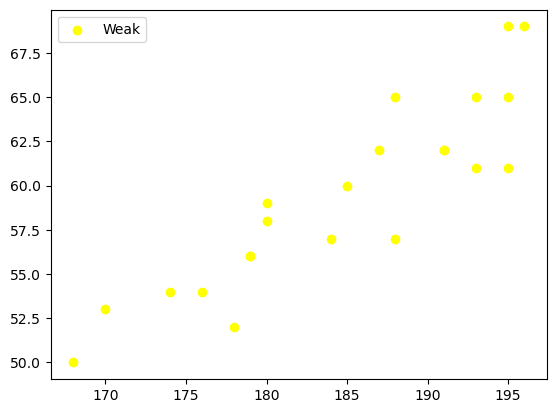

In [6]:
# 그래프 그려주는 도구 꺼내오기
import matplotlib.pyplot as plt

#plt.scatter(x, y)   # X축 : 키, Y축 : 몸무게
plt.scatter(data['Height'], data['Weight'],
           color = 'yellow', label = 'Weak')
plt.legend()  # 그래프에 범례(label) 표시
plt.show()

#### OverWeight 그래프 그리기
- 보라색으로 그리기

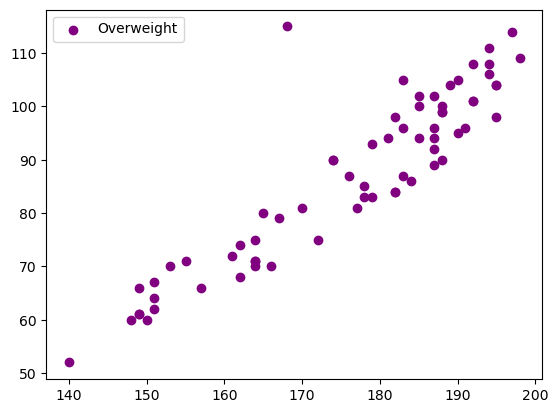

In [7]:
bol = bmi['Label'] == 'Overweight'  # 불리언 인덱싱한 결과를 사용하기 위해 변수에 저장
data = bmi.loc[bol]  # 라벨이 Weak인 전체 행에 대한 데이터를 가져옴 --> 변수에 저장 

plt.scatter(data['Height'], data['Weight'],
           color = 'purple', label = 'Overweight')
plt.legend()  # 그래프에 범례(label) 표시
plt.show()

#### 함수로 만들어서 그래프 그리기
- 반복되는 부분을 함수로 간략화

In [8]:
def myScatter(label, color) :  
    bol = bmi['Label'] == label  
    data = bmi.loc[bol]  
    plt.scatter(data['Height'], data['Weight'],
               color = color, label = label)

#### 전체 그래프 그리기

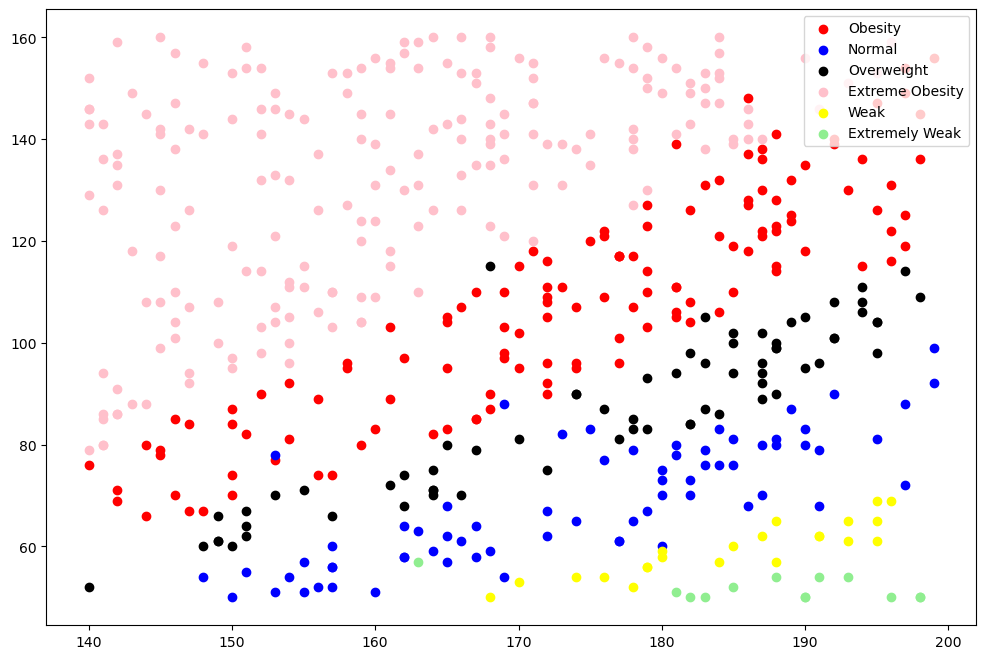

In [9]:
plt.figure(figsize=(12, 8))

myScatter('Obesity', 'red')
myScatter('Normal', 'blue')
myScatter('Overweight', 'black')
myScatter('Extreme Obesity', 'pink')
myScatter('Weak', 'yellow')
myScatter('Extremely Weak', 'lightgreen')

plt.legend()
plt.show()

In [10]:
bmi[bmi['Label'] == 'Normal']  # 153정도의 키, 78정도의 몸무게
h_153 = bmi[bmi['Height'] == 153]  
h_153
# 231	Female	153	78	Normal ==> Obesity로 변경 

,Gender,Height,Weight,Label
15,Female,153,107,Extreme Obesity
21,Female,153,149,Extreme Obesity
30,Male,153,121,Extreme Obesity
70,Female,153,51,Normal
212,Female,153,146,Extreme Obesity
231,Female,153,78,Normal
250,Male,153,70,Overweight
322,Male,153,104,Extreme Obesity
428,Female,153,77,Obesity
436,Female,153,133,Extreme Obesity


In [11]:
# 키가 153이고 몸무게가 78킬로인 여성을 Normal로 잘못 표기된 것을 Obesity로 수정
bmi.loc[231, 'Label'] = 'Obesity'

In [12]:
bmi.loc[bmi['Weight'] == 78]

,Gender,Height,Weight,Label
165,Male,181,78,Normal
231,Female,153,78,Obesity
234,Male,145,78,Obesity


### 모델 선택 및 하이퍼파라미터 튜닝
- 머신러닝의 모델 불러와서 사용하는 단계 

####  모델 불러오기
- KNN 모델

In [13]:
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier(n_neighbors=4) # 기본값

#### 문제데이터와 정답데이터로 분리

In [14]:
# 문제 : Height, Weight
X = bmi.loc[:,'Height' : 'Weight']
# 정답 : Label
y = bmi.loc[:,'Label']

#### 학습을 위해 훈련용(train)과 평가용(test)로 분리 , 데이터를 전체로 학습시키면 시간이 많이 들기 때문에 비중을 나눔 8:2까지는 허용
- 훈련 : 평가 = 7 : 3 

In [15]:
X_train = X.iloc[ :350] # 0~ 349 훈련용 문제
X_test =  X.iloc[350 : ]  # 350 ~ 499 평가용 문제
y_train = y.iloc[ :350]
y_test = y.iloc[350:]

In [16]:
print('훈련용 문제 : ', X_train.shape) 
print('평가용 문제 : ' , X_test.shape)  
print('훈련용 정답 : ', y_train.shape)
print('평가용 정답 : ', y_test.shape)

훈련용 문제 :  (350, 2)
평가용 문제 :  (150, 2)
훈련용 정답 :  (350,)
평가용 정답 :  (150,)


### 학습

In [17]:
# fit(문제, 정답) 을 통해서 값을 제공하고 그에 따른 규칙을 알아내는 과정
knn_model.fit(X_train, y_train)
# X 데이터(키, 몸무게)를 통해서 y 데이터(비만도 등급)의 규칙을 찾음.

KNeighborsClassifier(n_neighbors=4)

### 평가
- 모델이 제대로 만들어졌는지 평가
- 새로운 데이터(평가용으로 남겨둔 데이터)에 대해서 잘 예측하는지 확인 

In [18]:
import warnings
warnings.filterwarnings('ignore') # 주황색 워닝 문자를 없애는 법

In [19]:
# 예측 
knn_model.predict([[187, 80]]) 

array(['Normal'], dtype=object)

In [20]:
# 만들어진 모델 평가 ==> 학습에 사용하지 않는 새로운 문제와 정답으로 확인
# score(문제데이터, 정답데이터)
knn_model.score(X_test, y_test) # score 함수를 통해서 수치로 표현함

# 정답데이터와 예측정답을 비교
# 0 ~ 1 까지 값을 출력 
# 0: 모델의 성능이 좋지 않다. 규칙이 엉망이다 -> 규칙을 찾지 못함
# 1: 모델의 성능이 괜찮다. 규칙을 잘 찾음.

# 0.9 : 10개 문제 중에서 9개는 맞추는 경우 

0.8933333333333333

In [21]:
# 훈련용 데이터의 정확도
knn_model.score(X_train, y_train)

#규칙을 찾는데 사용된 데이터이기 때문에 test보다는 score 값이 높음. 학습 하는데 사용한 정답지 이기 때문 

0.9542857142857143

#### 학습을 하면서 발견된 사항
- train에 사용한 score 가 일반적으로 높음
- test를 사용한 score가 일반적으로 낮음  ==> 정상적인 범주

- train에 사용한 score가 낮음 ==> 과소적합, 머신러닝의 학습이 제대로 안되서 규칙을 정확히 찾지 못하는 경우  <--->   과대적합
- test를 사용한 score가 높음 ==> test는 운으로 잘 맞춤(비정상). 규칙을 잘못 참음 

### 하이퍼파라미터 튜닝하기
- KNN 모델의 하이퍼파라미터(n_neighbors)의 변화에 따라 score값을 확인
- ==> 최적의 하이퍼파라미터를 찾기 위해 튜닝
  

In [22]:
knn_model2 = KNeighborsClassifier(n_neighbors=3) # 튜닝값
knn_model2.fit(X_train, y_train)
knn_model2.score(X_test, y_test)

0.9

In [23]:
# 반복문 적용한 튜닝값
for i in range(1, 11) : 
    knn_model3 = KNeighborsClassifier(n_neighbors=i) 
    knn_model3.fit(X_train, y_train)
    print(f"{i}번째 score : {knn_model3.score(X_test, y_test)}")

1번째 score : 0.9066666666666666
2번째 score : 0.9066666666666666
3번째 score : 0.9
4번째 score : 0.8933333333333333
5번째 score : 0.9066666666666666
6번째 score : 0.9133333333333333
7번째 score : 0.9
8번째 score : 0.9133333333333333
9번째 score : 0.9133333333333333
10번째 score : 0.94


#### 모델 복잡도 곡선 그려보기
-과대적합, 과소적합, 일반화 확인하기 위해

In [28]:
# 훈련용과 평가용 데이터의 점수를 저장
# 룬련용 데이터 점수
train_score  = []
# 평가용 데이터 점수
test_score = []

# n_neighbors : 1 - 30Rkwl qksqhr
for i in range(1, 31) :
    #n_neighbors를 변경해가면서 모델 생성
    knn_model4 = KNeighborsClassifier(n_neighbors=i)
    
    # 생성된 모델 학습
    knn_model4.fit(X_train, y_train)
    
    # 만들어진 규칙으로  score 값 지정 - 과대적합, 과소적합, 일반화 확인
    
    train_score.append(knn_model4.score(X_train, y_train))
    test_score.append(knn_model4.score(X_test, y_test))

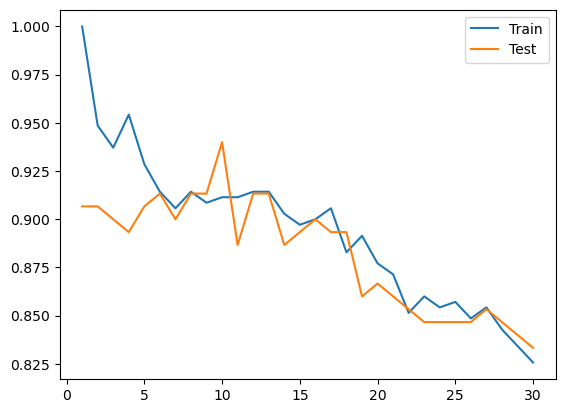

In [29]:
# 그래프로 확인하기
# 선그래프 : plot(x, y축의 값 필요)
# x축(학습량) : n_neighbors = range(1 , 31)
# y축(정확도) : score

plt.plot(range(1,31), train_score, label = 'Train')
plt.plot(range(1,31), test_score, label = 'Test')
plt.legend()
plt.show()